In [1]:
!pip install langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 19.9 MB/s eta 0:00:00


In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.9 MB/s eta 0:00:00


In [9]:
from google.colab import userdata
groq_api_key=userdata.get('GROQ_API_KEY')
print(groq_api_key)

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


In [4]:
langsmith = userdata.get('langsmith_api_key')
print(langsmith)

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


In [6]:
import os
os.environ["langsmith_api_key"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] ="CourseLanggraph"

In [7]:
from langchain_groq import ChatGroq

In [10]:
llm = ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7bb73b036810>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7bb73ac15110>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Start Building chtbot using LangGraph

In [14]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END #StateGraph is for state management purpose
from langgraph.graph.message import add_messages

In [15]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [16]:
graph_builder

In [17]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [ ]:
graph_builder.add_node("chatbot", chatbot)

In [21]:
graph_builder

In [22]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [23]:
graph=graph_builder.compile()

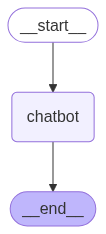

In [24]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [25]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: Hello


/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


dict_values([{'messages': AIMessage(content='Hello! 👋  How can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001899896, 'queue_time': 0.17824344199999997, 'total_time': 0.029172623}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--d0c3de55-9ed8-4c63-b868-a5d63234b6f5-0', usage_metadata={'input_tokens': 11, 'output_tokens': 15, 'total_tokens': 26})}])
content='Hello! 👋  How can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001899896, 'queue_time': 0.17824344199999997, 'total_time': 0.029172623}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run--d0c3de5

User: what is generative ai


dict_values([{'messages': AIMessage(content='Generative AI is a fascinating field of artificial intelligence that focuses on creating new content. \n\nThink of it like this: instead of simply analyzing existing data, generative AI learns the underlying patterns and structures within that data and then uses that knowledge to generate entirely new examples.\n\nHere\'s a breakdown:\n\n**What it does:**\n\n* **Creates new text:**  Imagine writing a poem, composing a song, or even drafting a news article – all with the help of AI.\n* **Generates images:**  From realistic photographs to abstract artwork, generative AI can produce stunning visuals.\n* **Designs music:** Compose original melodies, harmonies, and even entire musical pieces.\n* **Develops code:**  Assist programmers by generating code snippets in various programming languages.\n* **Translates languages:**  Break down language barriers by automatically translating text from one language to another.\n\n**How it works:**\n\nGenerat

User: quit
Good Bye
